In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import math
from sklearn.model_selection import train_test_split
%matplotlib inline
#Importing the libraries

In [ ]:
#Importing the data and reading it in input and outut variables
raw_data = pd.read_csv('ALR.csv')
y=pd.DataFrame(raw_data,columns=['Daily costs, $'])
x1=pd.DataFrame(raw_data, columns=['Inputs','Unnamed: 1'])
# Dropping the header row to convert data into only numbers 
x1=x1.drop(0)
x1=x1.drop(1).astype(int)
y=y.drop(0)
y=y.drop(1).astype(float)
ones=np.ones((len(x1),1))
x=np.append(ones, x1, axis=1)

In [ ]:
def coeffs(x,y):
  x_t=np.transpose(x)
  beta = np.dot((np.linalg.inv(np.dot(x_t,x))), np.dot(x_t,y))
  return beta 

In [ ]:
def metrics_train(a, b):  
    #calculating root mean square error
    MSE = np.square(np.subtract(b,a)).mean() 
    rmse = math.sqrt(MSE)
    return rmse

In [ ]:
def metrics_test(a,b):
   #calculating mean absolute error
    mae = np.mean(np.abs(a-b))
    #calculating r_square
    rss = np.sum(np.square((b- a)))
    mean = np.mean(b)
    sst = np.sum(np.square(b-mean))
    r_square = 1 - (rss/sst)
    return mae, r_square

In [ ]:
def regression(x,y):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
  beta=coeffs(x_train,y_train)
  y_train_predict=np.dot(x_train,beta)
  y_test_predict=np.dot(x_test,beta)
  rmse=metrics_train(y_train_predict,y_train)
  mae, r_square=metrics_test(y_test_predict,y_test)
  
  return beta, mae, rmse, r_square, y_train_predict, y_train

In [ ]:
beta, mae, rmse, r_square, y_train_predict, y_train=regression(x,y)
print("Coefficients ", beta)
print("Mean Absolute Error: ", mae[0])
print("Root Mean Square Error: ", rmse)
print("R square: ", r_square[0])

Coefficients  [[ 8.36626724e+02]
 [ 1.52346608e+00]
 [-3.47607902e-01]]
Mean Absolute Error:  4.03886887277759
Root Mean Square Error:  5.126715249022608
R square:  0.7336068805357521


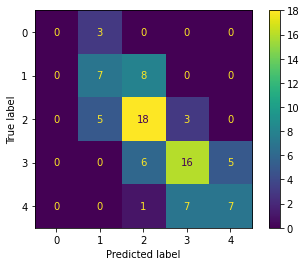

[[ 0  3  0  0  0]
 [ 0  7  8  0  0]
 [ 0  5 18  3  0]
 [ 0  0  6 16  5]
 [ 0  0  1  7  7]]


In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
y_true= (np.array(y_train))/10
y_train_predict=y_train_predict/10
cm =confusion_matrix(y_true.astype(int), y_train_predict.astype(int))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(cm)